In [259]:
#In the dataset, variable 1-28 were generated from PCA (after scaling)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import tensorflow as tf
from tensorflow import keras
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn


In [260]:
df=pd.read_csv('./Data/churn.csv')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [261]:
# Total charges should be int/float but is object. We need to convert. 
#errors = coerce because some values are blank
df=df[df['TotalCharges']!=" "]
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [262]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [263]:
df.drop('customerID', axis='columns',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [264]:
for col in df.columns:
    if(df[col].dtypes=='object'):
        print(col+"   : ",end='')
        print(df[col].unique())

gender   : ['Female' 'Male']
Partner   : ['Yes' 'No']
Dependents   : ['No' 'Yes']
PhoneService   : ['No' 'Yes']
MultipleLines   : ['No phone service' 'No' 'Yes']
InternetService   : ['DSL' 'Fiber optic' 'No']
OnlineSecurity   : ['No' 'Yes' 'No internet service']
OnlineBackup   : ['Yes' 'No' 'No internet service']
DeviceProtection   : ['No' 'Yes' 'No internet service']
TechSupport   : ['No' 'Yes' 'No internet service']
StreamingTV   : ['No' 'Yes' 'No internet service']
StreamingMovies   : ['No' 'Yes' 'No internet service']
Contract   : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   : ['Yes' 'No']
PaymentMethod   : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn   : ['No' 'Yes']


In [265]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [266]:
for col in df.columns:
    if(df[col].dtypes=='object'):
        print(col+"   : ",end='')
        print(df[col].unique())

gender   : ['Female' 'Male']
Partner   : ['Yes' 'No']
Dependents   : ['No' 'Yes']
PhoneService   : ['No' 'Yes']
MultipleLines   : ['No' 'Yes']
InternetService   : ['DSL' 'Fiber optic' 'No']
OnlineSecurity   : ['No' 'Yes']
OnlineBackup   : ['Yes' 'No']
DeviceProtection   : ['No' 'Yes']
TechSupport   : ['No' 'Yes']
StreamingTV   : ['No' 'Yes']
StreamingMovies   : ['No' 'Yes']
Contract   : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   : ['Yes' 'No']
PaymentMethod   : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn   : ['No' 'Yes']


In [267]:
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_cols :
    df[col].replace({'Yes':1,'No':0}, inplace=True)
df['gender'].replace({'Male':1,'Female':0}, inplace=True)
df=pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])

In [268]:
for col in df.columns:
    print(col+"   : ",end='')
    print(df[col].unique())

gender   : [0 1]
SeniorCitizen   : [0 1]
Partner   : [1 0]
Dependents   : [0 1]
tenure   : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService   : [0 1]
MultipleLines   : [0 1]
OnlineSecurity   : [0 1]
OnlineBackup   : [1 0]
DeviceProtection   : [0 1]
TechSupport   : [0 1]
StreamingTV   : [0 1]
StreamingMovies   : [0 1]
PaperlessBilling   : [1 0]
MonthlyCharges   : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges   : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn   : [0 1]
InternetService_DSL   : [1 0]
InternetService_Fiber optic   : [0 1]
InternetService_No   : [0 1]
Contract_Month-to-month   : [1 0]
Contract_One year   : [0 1]
Contract_Two year   : [0 1]
PaymentMethod_Bank transfer (automatic)   : [0 1]
PaymentMethod_Credit card (automatic)   : [0 1]
PaymentMethod_Electronic check   : [1

In [269]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [270]:
df.head(3)
#Note tenure, monthly charges and total charges are not scaled. 
#In order to use them in deep learning, all need to be scaled 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1


In [271]:
cols_to_scale=['MonthlyCharges','TotalCharges','tenure']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [272]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1


In [273]:
X=df.drop('Churn',axis='columns')
y=df['Churn']
df_copy=df.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

Epoch 1/100
176/176 [==============================] - 1s 905us/step - loss: 0.5590 - accuracy: 0.7405
Epoch 2/100
176/176 [==============================] - 0s 769us/step - loss: 0.4579 - accuracy: 0.7564
Epoch 3/100
176/176 [==============================] - 0s 729us/step - loss: 0.4307 - accuracy: 0.7874
Epoch 4/100
176/176 [==============================] - 0s 748us/step - loss: 0.4279 - accuracy: 0.7904
Epoch 5/100
176/176 [==============================] - 0s 870us/step - loss: 0.4258 - accuracy: 0.7931
Epoch 6/100
176/176 [==============================] - 0s 800us/step - loss: 0.4131 - accuracy: 0.7977
Epoch 7/100
176/176 [==============================] - 0s 752us/step - loss: 0.4273 - accuracy: 0.7898
Epoch 8/100
176/176 [==============================] - 0s 736us/step - loss: 0.4321 - accuracy: 0.7900
Epoch 9/100
176/176 [==============================] - 0s 788us/step - loss: 0.4109 - accuracy: 0.8029
Epoch 10/100
176/176 [==============================] - 0s 849us/step - l

176/176 [==============================] - 0s 801us/step - loss: 0.3950 - accuracy: 0.8097
Epoch 80/100
176/176 [==============================] - 0s 838us/step - loss: 0.3834 - accuracy: 0.8176
Epoch 81/100
176/176 [==============================] - 0s 810us/step - loss: 0.3872 - accuracy: 0.8156
Epoch 82/100
176/176 [==============================] - 0s 799us/step - loss: 0.3824 - accuracy: 0.8201
Epoch 83/100
176/176 [==============================] - 0s 797us/step - loss: 0.3766 - accuracy: 0.8283
Epoch 84/100
176/176 [==============================] - 0s 810us/step - loss: 0.3769 - accuracy: 0.8260
Epoch 85/100
176/176 [==============================] - 0s 842us/step - loss: 0.3800 - accuracy: 0.8252
Epoch 86/100
176/176 [==============================] - 0s 814us/step - loss: 0.3726 - accuracy: 0.8261
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8200
Epoch 88/100
176/176 [==============================] - 0s 821us/step - loss: 0

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

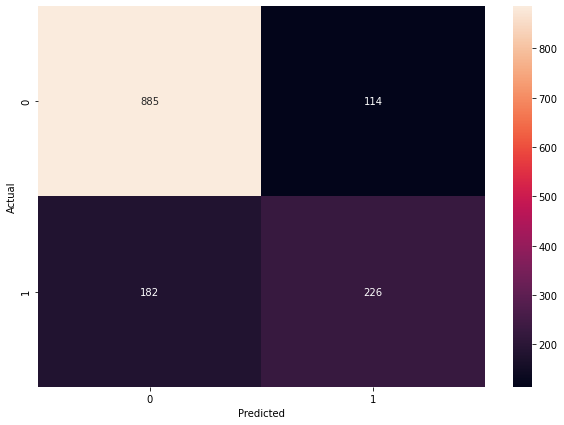

In [274]:
def ANN(X_train,X_test,y_train,y_test):
    model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.fit(X_train, y_train,epochs=100)
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    print(classification_report(y_test,y_pred))
    plt.figure(figsize = (10,7))
    sn.heatmap(tf.math.confusion_matrix(labels=y_test, predictions=y_pred),annot=True,fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    return(y_pred)

ANN(X_train,X_test,y_train,y_test)

In [278]:
print("Accuracy is : " + str(round((896+213)/(103+195+896+213),2))+"%")
print("Precision of positives is : " + str(round(226/(226+114),2))+'%')
print("Precision of negatives is : " + str(round(885/(885+182),2))+'%')
print("Recall of positives is : " + str(round(226/(226+182),2))+'%')
print("Recall of negatives is : " + str(round(896/(896+103),2))+'%')


Accuracy is : 0.79%
Precision of positives is : 0.66%
Precision of negatives is : 0.83%
Recall of positives is : 0.55%
Recall of negatives is : 0.9%


In [167]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [168]:
df_undersample = pd.concat([df[df['Churn']==0].sample(1869),df[df['Churn']==1]])
df_undersample['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

Epoch 1/100
94/94 [==============================] - 0s 790us/step - loss: 0.6575 - accuracy: 0.5887
Epoch 2/100
94/94 [==============================] - 0s 761us/step - loss: 0.5717 - accuracy: 0.7334
Epoch 3/100
94/94 [==============================] - 0s 736us/step - loss: 0.5230 - accuracy: 0.7580
Epoch 4/100
94/94 [==============================] - 0s 755us/step - loss: 0.5373 - accuracy: 0.7333
Epoch 5/100
94/94 [==============================] - 0s 738us/step - loss: 0.4989 - accuracy: 0.7556
Epoch 6/100
94/94 [==============================] - 0s 745us/step - loss: 0.5103 - accuracy: 0.7537
Epoch 7/100
94/94 [==============================] - 0s 768us/step - loss: 0.4984 - accuracy: 0.7593
Epoch 8/100
94/94 [==============================] - 0s 739us/step - loss: 0.5003 - accuracy: 0.7595
Epoch 9/100
94/94 [==============================] - 0s 769us/step - loss: 0.5077 - accuracy: 0.7555
Epoch 10/100
94/94 [==============================] - 0s 795us/step - loss: 0.4970 - accura

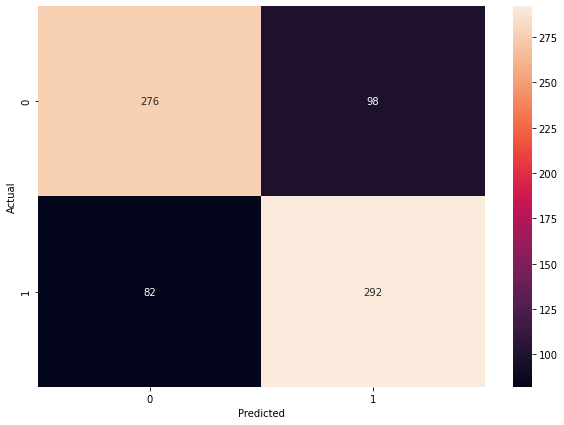

In [169]:
#Method 1 : Undersampling

X=df_undersample.drop('Churn',axis='columns')
y=df_undersample['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5,stratify=y)
ANN(X_train,X_test,y_train,y_test)

In [177]:
#Method 2 : Oversampling
print(df['Churn'].value_counts())
df_oversample = pd.concat([df[df['Churn']==0],df[df['Churn']==1].sample(5163,replace=True)])
print(df_oversample['Churn'].value_counts())

0    5163
1    1869
Name: Churn, dtype: int64
1    5163
0    5163
Name: Churn, dtype: int64


Epoch 1/100
259/259 [==============================] - 1s 836us/step - loss: 0.6805 - accuracy: 0.5522
Epoch 2/100
259/259 [==============================] - 0s 760us/step - loss: 0.5479 - accuracy: 0.7433
Epoch 3/100
259/259 [==============================] - 0s 684us/step - loss: 0.5147 - accuracy: 0.7504
Epoch 4/100
259/259 [==============================] - 0s 694us/step - loss: 0.5106 - accuracy: 0.7544
Epoch 5/100
259/259 [==============================] - 0s 791us/step - loss: 0.4997 - accuracy: 0.7586
Epoch 6/100
259/259 [==============================] - 0s 696us/step - loss: 0.4963 - accuracy: 0.7585
Epoch 7/100
259/259 [==============================] - 0s 838us/step - loss: 0.4858 - accuracy: 0.7652
Epoch 8/100
259/259 [==============================] - 0s 810us/step - loss: 0.4979 - accuracy: 0.7478
Epoch 9/100
259/259 [==============================] - 0s 684us/step - loss: 0.4849 - accuracy: 0.7613
Epoch 10/100
259/259 [==============================] - 0s 742us/step - l

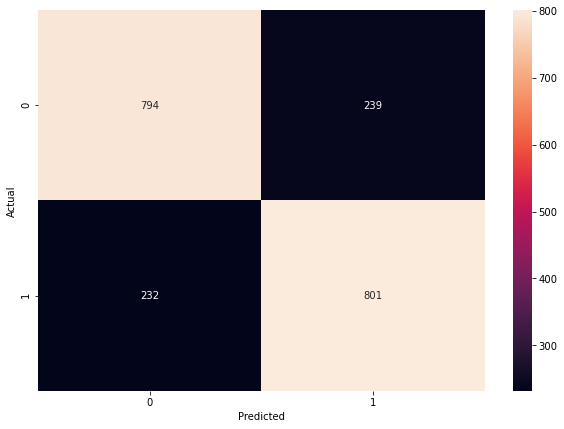

In [179]:
X=df_oversample.drop('Churn',axis='columns')
y=df_oversample['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5,stratify=y)
ANN(X_train,X_test,y_train,y_test)

In [185]:
#Method : SMOTE
X=df.drop('Churn',axis='columns')
y=df['Churn']

from imblearn.over_sampling import SMOTE
smote=SMOTE (sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X,y)
print(y_sm.value_counts())

1    5163
0    5163
Name: Churn, dtype: int64


Epoch 1/100
259/259 [==============================] - 0s 709us/step - loss: 0.5953 - accuracy: 0.6814
Epoch 2/100
259/259 [==============================] - 0s 771us/step - loss: 0.4859 - accuracy: 0.7726
Epoch 3/100
259/259 [==============================] - 0s 729us/step - loss: 0.4837 - accuracy: 0.7751
Epoch 4/100
259/259 [==============================] - 0s 741us/step - loss: 0.4843 - accuracy: 0.7701
Epoch 5/100
259/259 [==============================] - 0s 738us/step - loss: 0.4676 - accuracy: 0.7783
Epoch 6/100
259/259 [==============================] - 0s 717us/step - loss: 0.4636 - accuracy: 0.7826
Epoch 7/100
259/259 [==============================] - 0s 770us/step - loss: 0.4662 - accuracy: 0.7717
Epoch 8/100
259/259 [==============================] - 0s 729us/step - loss: 0.4559 - accuracy: 0.7836
Epoch 9/100
259/259 [==============================] - 0s 784us/step - loss: 0.4583 - accuracy: 0.7830
Epoch 10/100
259/259 [==============================] - 0s 701us/step - l

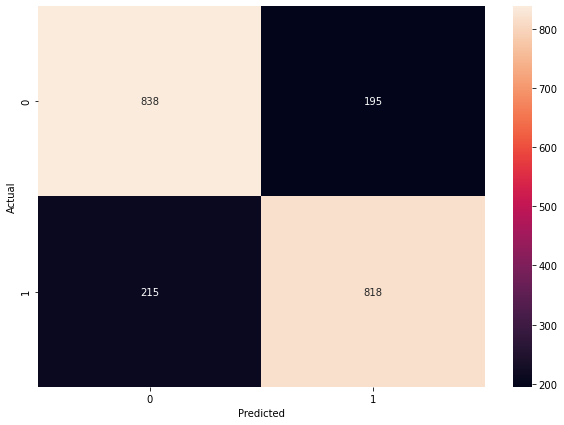

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 5,stratify=y_sm)
ANN(X_train,X_test,y_train,y_test)

Epoch 1/100
97/97 [==============================] - 0s 763us/step - loss: 0.6930 - accuracy: 0.5492
Epoch 2/100
97/97 [==============================] - 0s 780us/step - loss: 0.6040 - accuracy: 0.7349
Epoch 3/100
97/97 [==============================] - 0s 869us/step - loss: 0.5387 - accuracy: 0.7701
Epoch 4/100
97/97 [==============================] - 0s 852us/step - loss: 0.5219 - accuracy: 0.7511
Epoch 5/100
97/97 [==============================] - 0s 802us/step - loss: 0.5072 - accuracy: 0.7535
Epoch 6/100
97/97 [==============================] - 0s 743us/step - loss: 0.5204 - accuracy: 0.7399
Epoch 7/100
97/97 [==============================] - 0s 777us/step - loss: 0.5133 - accuracy: 0.7477
Epoch 8/100
97/97 [==============================] - 0s 748us/step - loss: 0.5155 - accuracy: 0.7545
Epoch 9/100
97/97 [==============================] - 0s 773us/step - loss: 0.5068 - accuracy: 0.7532
Epoch 10/100
97/97 [==============================] - 0s 738us/step - loss: 0.5038 - accura

97/97 [==============================] - 0s 739us/step - loss: 0.4692 - accuracy: 0.7710
Epoch 59/100
97/97 [==============================] - 0s 714us/step - loss: 0.4697 - accuracy: 0.7772
Epoch 60/100
97/97 [==============================] - 0s 704us/step - loss: 0.4698 - accuracy: 0.7710
Epoch 61/100
97/97 [==============================] - 0s 702us/step - loss: 0.4687 - accuracy: 0.7666
Epoch 62/100
97/97 [==============================] - 0s 727us/step - loss: 0.4796 - accuracy: 0.7653
Epoch 63/100
97/97 [==============================] - 0s 714us/step - loss: 0.4502 - accuracy: 0.7751
Epoch 64/100
97/97 [==============================] - 0s 719us/step - loss: 0.4875 - accuracy: 0.7633
Epoch 65/100
97/97 [==============================] - 0s 722us/step - loss: 0.4614 - accuracy: 0.7754
Epoch 66/100
97/97 [==============================] - 0s 822us/step - loss: 0.4684 - accuracy: 0.7753
Epoch 67/100
97/97 [==============================] - 0s 692us/step - loss: 0.4644 - accuracy: 

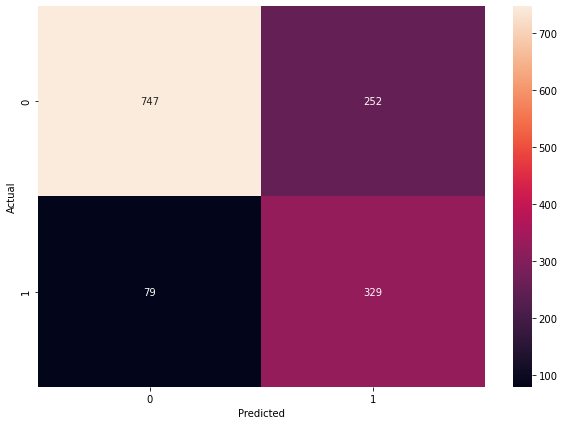

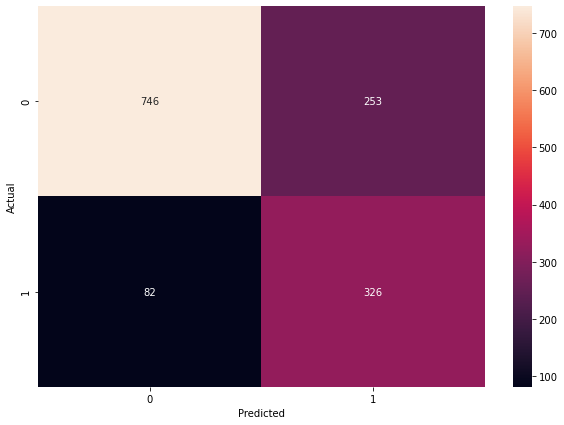

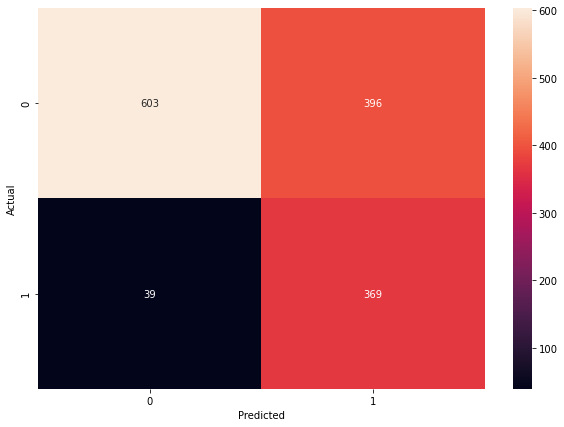

In [244]:
# Method 4: Ensemble (Divide majority class into minority sizes)

def create_train_batch(df,start,end):
    df1= pd.concat([df[df['Churn']==0][start:end],df[df['Churn']==1]])
    X=df1.drop('Churn',axis='columns')
    y=df1['Churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5,stratify=y)
    return(X_train,y_train)

X_train, y_train=create_train_batch(df_copy,0,2000)
y_pred1=ANN(X_train,X_test,y_train,y_test)

X_train, y_train=create_train_batch(df_copy,2000,4000)
y_pred2=ANN(X_train,X_test,y_train,y_test)

X_train, y_train=create_train_batch(df_copy,4000,5163)
y_pred3=ANN(X_train,X_test,y_train,y_test)




In [258]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred1)):
    if(y_pred1[i]+y_pred2[i]+y_pred3[i])>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0
        
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       999
           1       0.54      0.85      0.66       408

    accuracy                           0.75      1407
   macro avg       0.73      0.78      0.73      1407
weighted avg       0.81      0.75      0.76      1407

